In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_track_txt(track_txt_path) -> pd.DataFrame:
    # track_txt_path = "../experiments/rocket/nov_28/t1/VID_20241129_011318_2.txt"
    f = open(track_txt_path, "r")
    f.readline()
    l1 = f.readline()[:-2]
    l2 = f.readline()[:-2] # x = -y
    track_names = [i for i in l1.split("\t") if i != ""]
    columns = l2.split("\t")

    cn_per_track = int( (len(columns) - 1) / len(track_names) )

    for i in range(1, len(columns)):
        columns[i] = track_names[(i-1)//cn_per_track].replace(" ", "_") + "__" + columns[i]


    data = np.array([[float('nan') if j == "" else float(j.strip())  for j in i[:-1].split("\t")]for i in f.readlines()])

    df = pd.DataFrame(data, columns=columns)
    # df.copy()
    # for tn in track_names:
    #     df[tn + "__pixelx"], df[tn + "__pixely"] = df[tn + "__pixely"], calib[2][1] -df[tn + "__pixelx"]
    # df["px"] = df[""]
    return df

In [3]:
df = load_track_txt("../processed_video/pupu.txt")

In [4]:
df = df.dropna()

In [5]:
df.head()

,t,mass_B__x,mass_B__y,mass_C__x,mass_C__y,mass_A__x,mass_A__y
0,0.233333,-0.009198,0.001782,0.011036,0.001807,0.000863,0.001352
1,0.266667,-0.009107,0.001873,0.011059,0.001675,0.000863,0.001424
2,0.300000,-0.009062,0.001827,0.011136,0.001931,0.000863,0.001424
3,0.333333,-0.009062,0.001827,0.011110,0.001726,0.000863,0.001496
4,0.366667,-0.009016,0.002237,0.011136,0.001777,0.000790,0.001641


In [6]:
B_xy =df[["mass_B__x", "mass_B__y"]].to_numpy()
C_xy =df[["mass_C__x", "mass_C__y"]].to_numpy()
A_xy =df[["mass_A__x", "mass_A__y"]].to_numpy()
t = df["t"].to_numpy()

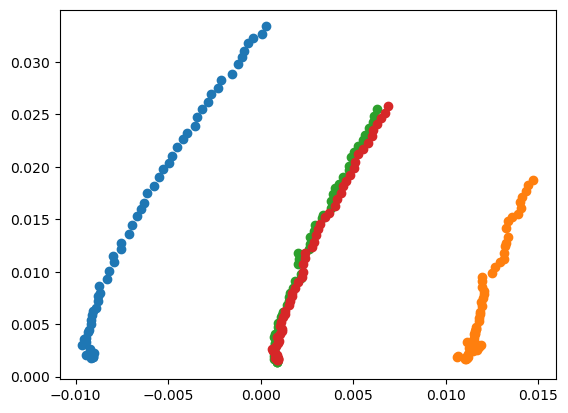

In [7]:
plt.scatter(df["mass_B__x"], df["mass_B__y"])
plt.scatter(df["mass_C__x"], df["mass_C__y"])
plt.scatter(df["mass_A__x"], df["mass_A__y"])
mean_xy = ((B_xy +  C_xy)/2)*0.5 + A_xy*0.5

plt.scatter(mean_xy[:, 0], mean_xy[:, 1])

In [8]:
phis = np.zeros((len(t)))

for i in range(len(t)):

    m, b = np.polyfit([mean_xy[i, 0], B_xy[i, 0], C_xy[i, 0]], [mean_xy[i, 1], B_xy[i, 1], C_xy[i, 1]], 1)
    phi = -np.arctan(m)
    print(np.rad2deg(phi))
    phis[i] = phi
    


-0.07133691611224467
0.5589520751155798
-0.29686813687975444
0.2843470495204015
1.300563758717109
0.9699025236134021
1.6782592127568112
2.4419883375508364
3.0310427163709606
3.9297650799639308
4.505440230940063
4.235283082196278
4.933358494315108
5.077214840372623
6.337686608109
7.044628428906038
7.6376875045731625
8.391612088844028
9.2710147372518
10.833824727520149
11.013235517339128
11.059832737708224
12.680438918370509
14.403094977217629
16.08752303173373
18.161915570881586
19.60253577713082
21.040709879487256
20.96071458417587
22.911724348678593
24.31619921154143
26.26355993114708
26.66273427307938
27.430859148400103
28.789097544088488
30.028135352686835
31.676797488389333
32.90485383335105
33.591842788965316
34.49201933104535
35.31330188817665
35.87932960002817
36.03968512091079
37.110632286130404
37.90262311184998
38.557806412238534
39.82111079836317
40.42872036951427
40.34177877085709
40.80985054817275
42.05846759579546
43.30542770920448
43.53464802940684
43.71519535051723
44.6

In [9]:
from scipy.interpolate import PchipInterpolator, CubicSpline
from scipy.interpolate import make_smoothing_spline

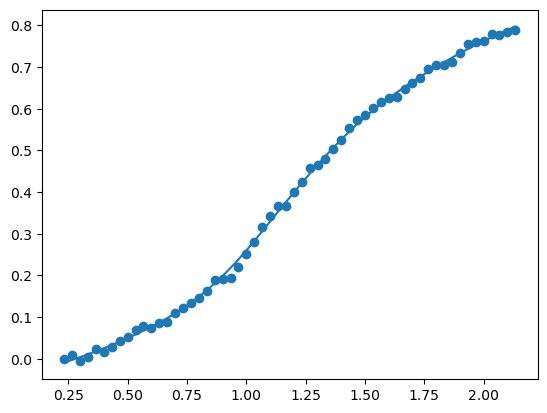

In [10]:
interp_phi = make_smoothing_spline(t, phis, lam=0.005)
plt.scatter(t, phis)
plt.plot(t, interp_phi(t))

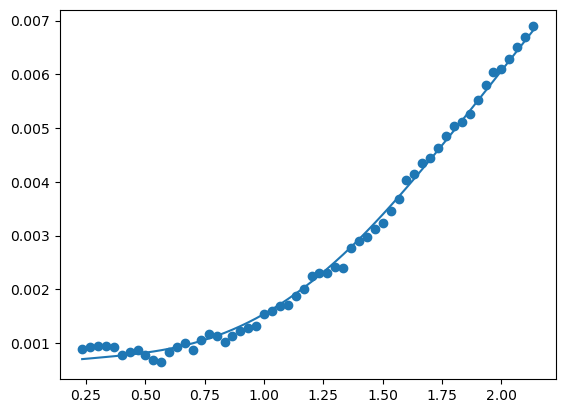

In [11]:
interp_x = make_smoothing_spline(t, mean_xy[:, 0], lam=0.1)
plt.scatter(t, mean_xy[:, 0])
plt.plot(t, interp_x(t))

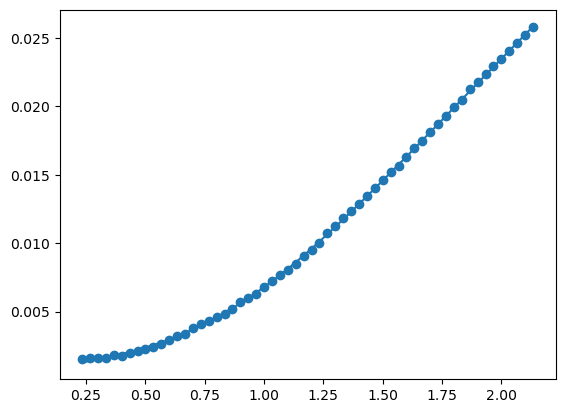

In [12]:
interp_y = make_smoothing_spline(t, mean_xy[:, 1], lam=0.01)
plt.scatter(t, mean_xy[:, 1])
plt.plot(t, interp_y(t))

In [13]:
t

array([0.2333333, 0.2666667, 0.3      , 0.3333333, 0.3666667, 0.4      ,
       0.4333333, 0.4666667, 0.5      , 0.5333333, 0.5666667, 0.6      ,
       0.6333333, 0.6666667, 0.7      , 0.7333333, 0.7666667, 0.8      ,
       0.8333333, 0.8666667, 0.9      , 0.9333333, 0.9666667, 1.       ,
       1.033333 , 1.066667 , 1.1      , 1.133333 , 1.166667 , 1.2      ,
       1.233333 , 1.266667 , 1.3      , 1.333333 , 1.366667 , 1.4      ,
       1.433333 , 1.466667 , 1.5      , 1.533333 , 1.566667 , 1.6      ,
       1.633333 , 1.666667 , 1.7      , 1.733333 , 1.766667 , 1.8      ,
       1.833333 , 1.866667 , 1.9      , 1.933333 , 1.966667 , 2.       ,
       2.033333 , 2.066667 , 2.1      , 2.133333 ])

In [18]:

from matplotlib.patches import Polygon
def rect_patch(x, y, theta, c="k"):
    w, h = 0.02, 0.002   # Width and Height
    # Compute rectangle corners (centered at origin)
    rect_corners = np.array([
        [-w/2, -h/2],
        [w/2, -h/2],
        [w/2, h/2],
        [-w/2, h/2]
    ])
    rotation_matrix = np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])

    # Rotate and translate rectangle
    rotated_corners = rect_corners @ rotation_matrix.T + np.array([x, y])
    return Polygon(rotated_corners, edgecolor=c, facecolor="none", lw=2)

In [31]:
t

array([0.2333333, 0.2666667, 0.3      , 0.3333333, 0.3666667, 0.4      ,
       0.4333333, 0.4666667, 0.5      , 0.5333333, 0.5666667, 0.6      ,
       0.6333333, 0.6666667, 0.7      , 0.7333333, 0.7666667, 0.8      ,
       0.8333333, 0.8666667, 0.9      , 0.9333333, 0.9666667, 1.       ,
       1.033333 , 1.066667 , 1.1      , 1.133333 , 1.166667 , 1.2      ,
       1.233333 , 1.266667 , 1.3      , 1.333333 , 1.366667 , 1.4      ,
       1.433333 , 1.466667 , 1.5      , 1.533333 , 1.566667 , 1.6      ,
       1.633333 , 1.666667 , 1.7      , 1.733333 , 1.766667 , 1.8      ,
       1.833333 , 1.866667 , 1.9      , 1.933333 , 1.966667 , 2.       ,
       2.033333 , 2.066667 , 2.1      , 2.133333 ])

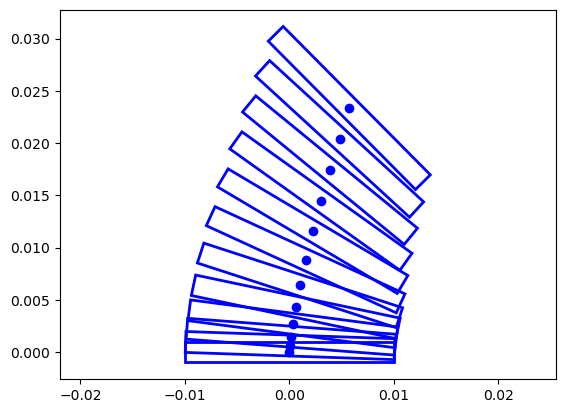

In [32]:
T = np.linspace(0, 2, 7)
# T = t[:-2][::9]
X = interp_x(T); X -= X[0]
Y = interp_y(T); Y -= Y[0]
P = interp_phi(T); P -= P[0]



fig, ax = plt.subplots()

plt.axis("equal")

# plt.scatter(X, Y, c="r")

# for i in zip(X, Y, P):
#     ax.add_patch(rect_patch(*i, c="r"))


# T = np.linspace(0, 2, 7)
T = t[:-2][::5]
X = interp_x(T); X -= X[0]
Y = interp_y(T); Y -= Y[0]
P = interp_phi(T); P -= P[0]



# fig, ax = plt.subplots()

plt.axis("equal")

plt.scatter(X, Y, c="b")

for i in zip(X, Y, P):
    ax.add_patch(rect_patch(*i, c="b"))

In [33]:
f = open("../openfoam_cases/task.txt", "w")

for i in zip(X, Y, P):
    f.write(f"{i[0]} {0.0} {i[1]+0.001} {i[2]}\n")
# f.write("\n")
f.close()

In [29]:
f

<_io.TextIOWrapper name='../openfoam_cases/task.txt' mode='w' encoding='UTF-8'>